<a href="https://colab.research.google.com/github/FlexTaco/cs370/blob/main/assignments/assignment-1b/assignment1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 1
model function:
ŷ(x; w) = $Σ_{j=0}^{m}$ $w_{j}$ * $x^{j}$

loss function(Ridge regression + MSE):
L = 1/n $Σ_{i=0}^{n} $($y ̂_{i}$ - $y_{i}$)^2 + λ $Σ_{j=1}^{M}$$w_{j}^{2}$

Gradient:
∂L/∂w = L = 1/2n $Σ_{i=0}^{n} $($y ̂_{i}$ - $y_{i}$) + λ/2 $Σ_{j=1}^{M}$$w_{j}$

weight formula:
$w_{j}$ = $w_{j}$ - α *∂L/∂$w_{j}$



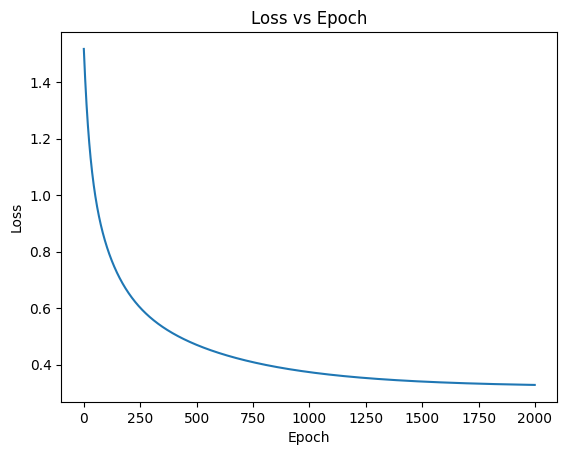

[[-0.86681163]
 [-0.42141896]
 [ 0.00180116]
 [ 0.02096794]
 [ 0.24420029]
 [ 0.436113  ]
 [ 0.03525937]
 [ 0.18264686]
 [ 0.2245867 ]]
[0.30173016]


In [ ]:
import torch
import matplotlib.pyplot as plt


#remake from the notebook but using pytorchj
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = torch.linspace(domain[0], domain[1], sample_size)
    y = func(x) + torch.normal(mean=0, std=1, size=(sample_size,), dtype=torch.float32)
    return x, y

def sinusoidal(x):
    return torch.sin(2 * torch.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_train_unsqueeze = torch.unsqueeze(x_train, dim=1)
x_train_poly = torch.cat([x_train_unsqueeze**i for i in range(1, 9 + 1)], dim=1)
#this didn't work
#x_train_poly = torch.stack([x_train[:, 0]**i for i in range(1, 9 + 1)], dim=1)

#make into tensors
x_train = x_train_poly.float()
y_train = y_train.float().reshape(-1, 1)

weights = torch.randn(9, 1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

#parameters, come back and edit epoch
learning_rate = 0.01
epochs = 2000
lambda_reg = 0.1


loss_arr = []
for epoch in range(epochs):

  predictions = torch.mm(x_train, weights) + bias

  #adding calculating loss
  errors = predictions - y_train
  mse_loss = torch.mean(errors**2) / 2
  l2_reg = (lambda_reg / 2) * torch.sum(weights**2)
  loss = mse_loss + l2_reg
  loss.backward()

  #recal weights and bias
  with torch.no_grad():
    weights -= learning_rate * weights.grad
    bias -= learning_rate * bias.grad
  weights.grad.zero_()
  bias.grad.zero_()

  loss_arr.append(loss.item())

#loss vs epochs
plt.plot(loss_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

print(weights.detach().numpy())
print(bias.detach().numpy())

# Logistic Regression

# Task 1